**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.



In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)

Шаг 1. Загрузка данных

In [ ]:
df = pd.read_csv('/content/dataset_segment_bank.csv') # Загружаем dataset
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
df.info() # просмотр инфо данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

In [ ]:
df.columns

Index(['Идентификатор', 'Дата рождения',
       'Дисциплина клиентов без просрочки по кредиту', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Сумма перевода', 'Максимальная сумма перевода',
       'Средняя сумма перевода', 'Полная сумма перевода',
       'Канал, через который пришел клиент', 'Оператор связи', 'Пол'],
      dtype='object')

Шаг 2. Первичная обработка данных

In [ ]:
# корректировка заголовков

dct_name = {'Дисциплина клиентов без просрочки по кредиту' : 'Признак без просрочки',
            'Канал, через который пришел клиент': 'Канал клиента'}
df.rename(columns=dct_name,
          inplace=True)

df.columns = df.columns.str.lower()

dct_name = {'идентификатор': 'client_id',
            'дата рождения': 'date_ birth',
            'признак без просрочки': 'sign_delay',
            'количество переводов': 'count_number',
            'тип переводов': 'type_number',
            'география переводов': 'geography_number',
            'география телефона': 'geography_phone',
            'сумма перевода': 'sum_number',
            'максимальная сумма перевода': 'max_number',
            'средняя сумма перевода': 'mean_number',
            'полная сумма перевода': 'full_sum_number',
            'канал клиента': 'client channel',
            'оператор связи': 'tele_operator',
            'пол': 'age'}

df.rename(columns=dct_name,
          inplace=True)

columns_to_pic = dict(zip(dct_name.values(), dct_name.keys()))
columns_to_pic

{'client_id': 'идентификатор',
 'date_ birth': 'дата рождения',
 'sign_delay': 'признак без просрочки',
 'count_number': 'количество переводов',
 'type_number': 'тип переводов',
 'geography_number': 'география переводов',
 'geography_phone': 'география телефона',
 'sum_number': 'сумма перевода',
 'max_number': 'максимальная сумма перевода',
 'mean_number': 'средняя сумма перевода',
 'full_sum_number': 'полная сумма перевода',
 'client channel': 'канал клиента',
 'tele_operator': 'оператор связи',
 'age': 'пол'}

In [ ]:
#  корректировка типов данных
df.dtypes

client_id             int64
date_ birth          object
sign_delay           object
count_number        float64
type_number         float64
geography_number    float64
geography_phone     float64
sum_number          float64
max_number          float64
mean_number         float64
full_sum_number     float64
client channel       object
tele_operator        object
age                  object
dtype: object

In [ ]:
df = df.astype({'date_ birth': 'datetime64[ns]',
                'count_number': 'int64',
                'type_number' : 'int64',
                 'geography_number': 'int64',
                 'geography_phone': 'int64',
                 'sum_number': 'int64',
                 'max_number': 'int64',
                 'mean_number': 'int64',
                 'full_sum_number': 'int64',
                },
               errors='ignore')
df.dtypes

client_id                    int64
date_ birth         datetime64[ns]
sign_delay                  object
count_number               float64
type_number                float64
geography_number           float64
geography_phone            float64
sum_number                 float64
max_number                 float64
mean_number                float64
full_sum_number            float64
client channel              object
tele_operator               object
age                         object
dtype: object

In [ ]:
# работа с дублями
print(f'В наборе данных имеется {df.duplicated().sum()} дублей.')
df.loc[df.duplicated()] # посмотрели на дубли


В наборе данных имеется 575 дублей.


,client_id,date_ birth,sign_delay,count_number,type_number,geography_number,geography_phone,sum_number,max_number,mean_number,full_sum_number,client channel,tele_operator,age
285,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
334,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
459,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
466,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
528,4872767,1968-02-18,BAD,13.0,2.0,77.0,77.0,316064.16,150000.0,24312.6276,316064.16,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50150,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50151,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50152,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М


In [ ]:
df.drop_duplicates(keep='first', # Удалили дубли
                   inplace=True)
print(f'В наборе данных имеется {df.duplicated().sum()} дублей.')

В наборе данных имеется 0 дублей.


In [ ]:
df.columns

Index(['client_id', 'date_ birth', 'sign_delay', 'count_number', 'type_number',
       'geography_number', 'geography_phone', 'sum_number', 'max_number',
       'mean_number', 'full_sum_number', 'client channel', 'tele_operator',
       'age'],
      dtype='object')

In [ ]:
# аномальные значения
# разделим признаки на непрерывные и дискретные
lst_cont = ['count_number', 'sum_number', 'max_number',
            'mean_number', 'full_sum_number']

lst_disc = ['sign_delay', 'geography_number', 'geography_phone', 'type_number',
          'client channel', 'tele_operator', 'age']

In [ ]:
lst_cont = ['count_number', 'sum_number', 'max_number', # Смотрим на непрерывные признаки
            'mean_number', 'full_sum_number']

for col in lst_cont:
    print(f'----- признак {col} ------')
    print(df[col].value_counts())
    print()

----- признак count_number ------
count_number
2.0      4798
3.0      4771
4.0      3489
5.0      2835
6.0      2520
         ... 
252.0       1
234.0       1
327.0       1
324.0       1
813.0       1
Name: count, Length: 291, dtype: int64

----- признак sum_number ------
sum_number
50150.00       287
30100.00       216
50000.00       206
30150.00       205
100150.00      201
              ... 
231862.93        1
229433.44        1
538484.92        1
631895.06        1
12870362.54      1
Name: count, Length: 33942, dtype: int64

----- признак max_number ------
max_number
50000.0     4941
100000.0    3122
30000.0     3019
55000.0     2436
500000.0    2001
            ... 
109280.0       1
43120.0        1
151627.4       1
288978.0       1
256974.0       1
Name: count, Length: 3472, dtype: int64

----- признак mean_number ------
mean_number
25075.0000    286
15050.0000    217
15075.0000    205
50000.0000    205
30000.0000    202
             ... 
60189.4000      1
12940.0000      1
16330

In [ ]:
lst_disc = ['sign_delay', 'geography_number', 'geography_phone', 'type_number', # Смотрим на дискретные признаки
          'client channel', 'tele_operator', 'age']

for col in lst_disc:
    print(f'----- признак {col} ------')
    print(df[col].value_counts())
    print()

----- признак sign_delay ------
sign_delay
GOOD      26852
MIDDLE    13577
BAD        9219
Name: count, dtype: int64

----- признак geography_number ------
geography_number
77.0        19144
78.0         4140
61.0         2338
23.0         2113
66.0         1502
            ...  
75.0            2
498001.0        2
6.0             1
20.0            1
19.0            1
Name: count, Length: 74, dtype: int64

----- признак geography_phone ------
geography_phone
77.0    13610
78.0     5468
23.0     2457
61.0     2266
66.0     1638
        ...  
0.0         2
25.0        1
38.0        1
75.0        1
14.0        1
Name: count, Length: 64, dtype: int64

----- признак type_number ------
type_number
 2.0     18673
 5.0     13778
 69.0     6527
 6.0      2542
 8.0      1991
 1.0      1633
 10.0     1549
 0.0       739
 12.0      468
 26.0      289
 32.0      253
 16.0      248
 37.0      220
 11.0      194
 45.0      157
 7.0       139
 44.0       62
 58.0       45
 3.0        30
 21.0       14

In [ ]:
# Проверяем описательные статистики для непрерывных признаков
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df[lst_cont].describe(percentiles=per)
# макимальное значение sum_number - аномалия данных

,count_number,sum_number,max_number,mean_number,full_sum_number
count,49583.000000,4.958300e+04,4.958300e+04,49583.000000,4.958300e+04
mean,15.886130,2.943397e+05,1.680532e+05,34735.108103,2.943397e+05
std,29.672765,4.486187e+05,1.408856e+05,43694.270643,4.486187e+05
min,1.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01
1%,1.000000,2.353525e+04,1.488524e+04,2360.318008,2.353525e+04
5%,2.000000,3.993920e+04,3.000000e+04,4540.988570,3.993920e+04
25%,4.000000,9.137250e+04,5.500000e+04,10254.507200,9.137250e+04
50%,9.000000,1.857500e+05,1.200000e+05,20049.153800,1.857500e+05
75%,17.000000,3.759768e+05,2.350000e+05,41927.295450,3.759768e+05
95%,53.000000,8.032824e+05,4.900000e+05,113935.997830,8.032824e+05


In [ ]:
# Проверяем описательные статистики для дискретных признаков
df[lst_disc].describe(percentiles=per)
# макимальное значение geography_number - аномалия данных

,geography_number,geography_phone,type_number
count,49616.000000,47781.000000,49616.000000
mean,110.669744,58.206735,13.224484
std,4998.489682,22.707858,22.350063
min,0.000000,0.000000,-1.000000
1%,2.000000,2.000000,0.000000
5%,13.000000,10.000000,2.000000
25%,48.000000,42.000000,2.000000
50%,73.000000,66.000000,5.000000
75%,77.000000,77.000000,6.000000
95%,78.000000,78.000000,69.000000


In [ ]:
# Строим ящик с усами
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

<ipython-input-17-2a1daaf8762e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index_fig + 1)
<ipython-input-17-2a1daaf8762e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index_fig + 1)
<ipython-input-17-2a1daaf8762e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index_fig + 1)
<ipython-input-17-2a1daaf8762e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index_fig + 1)
<ipython-input-17-2a1daa

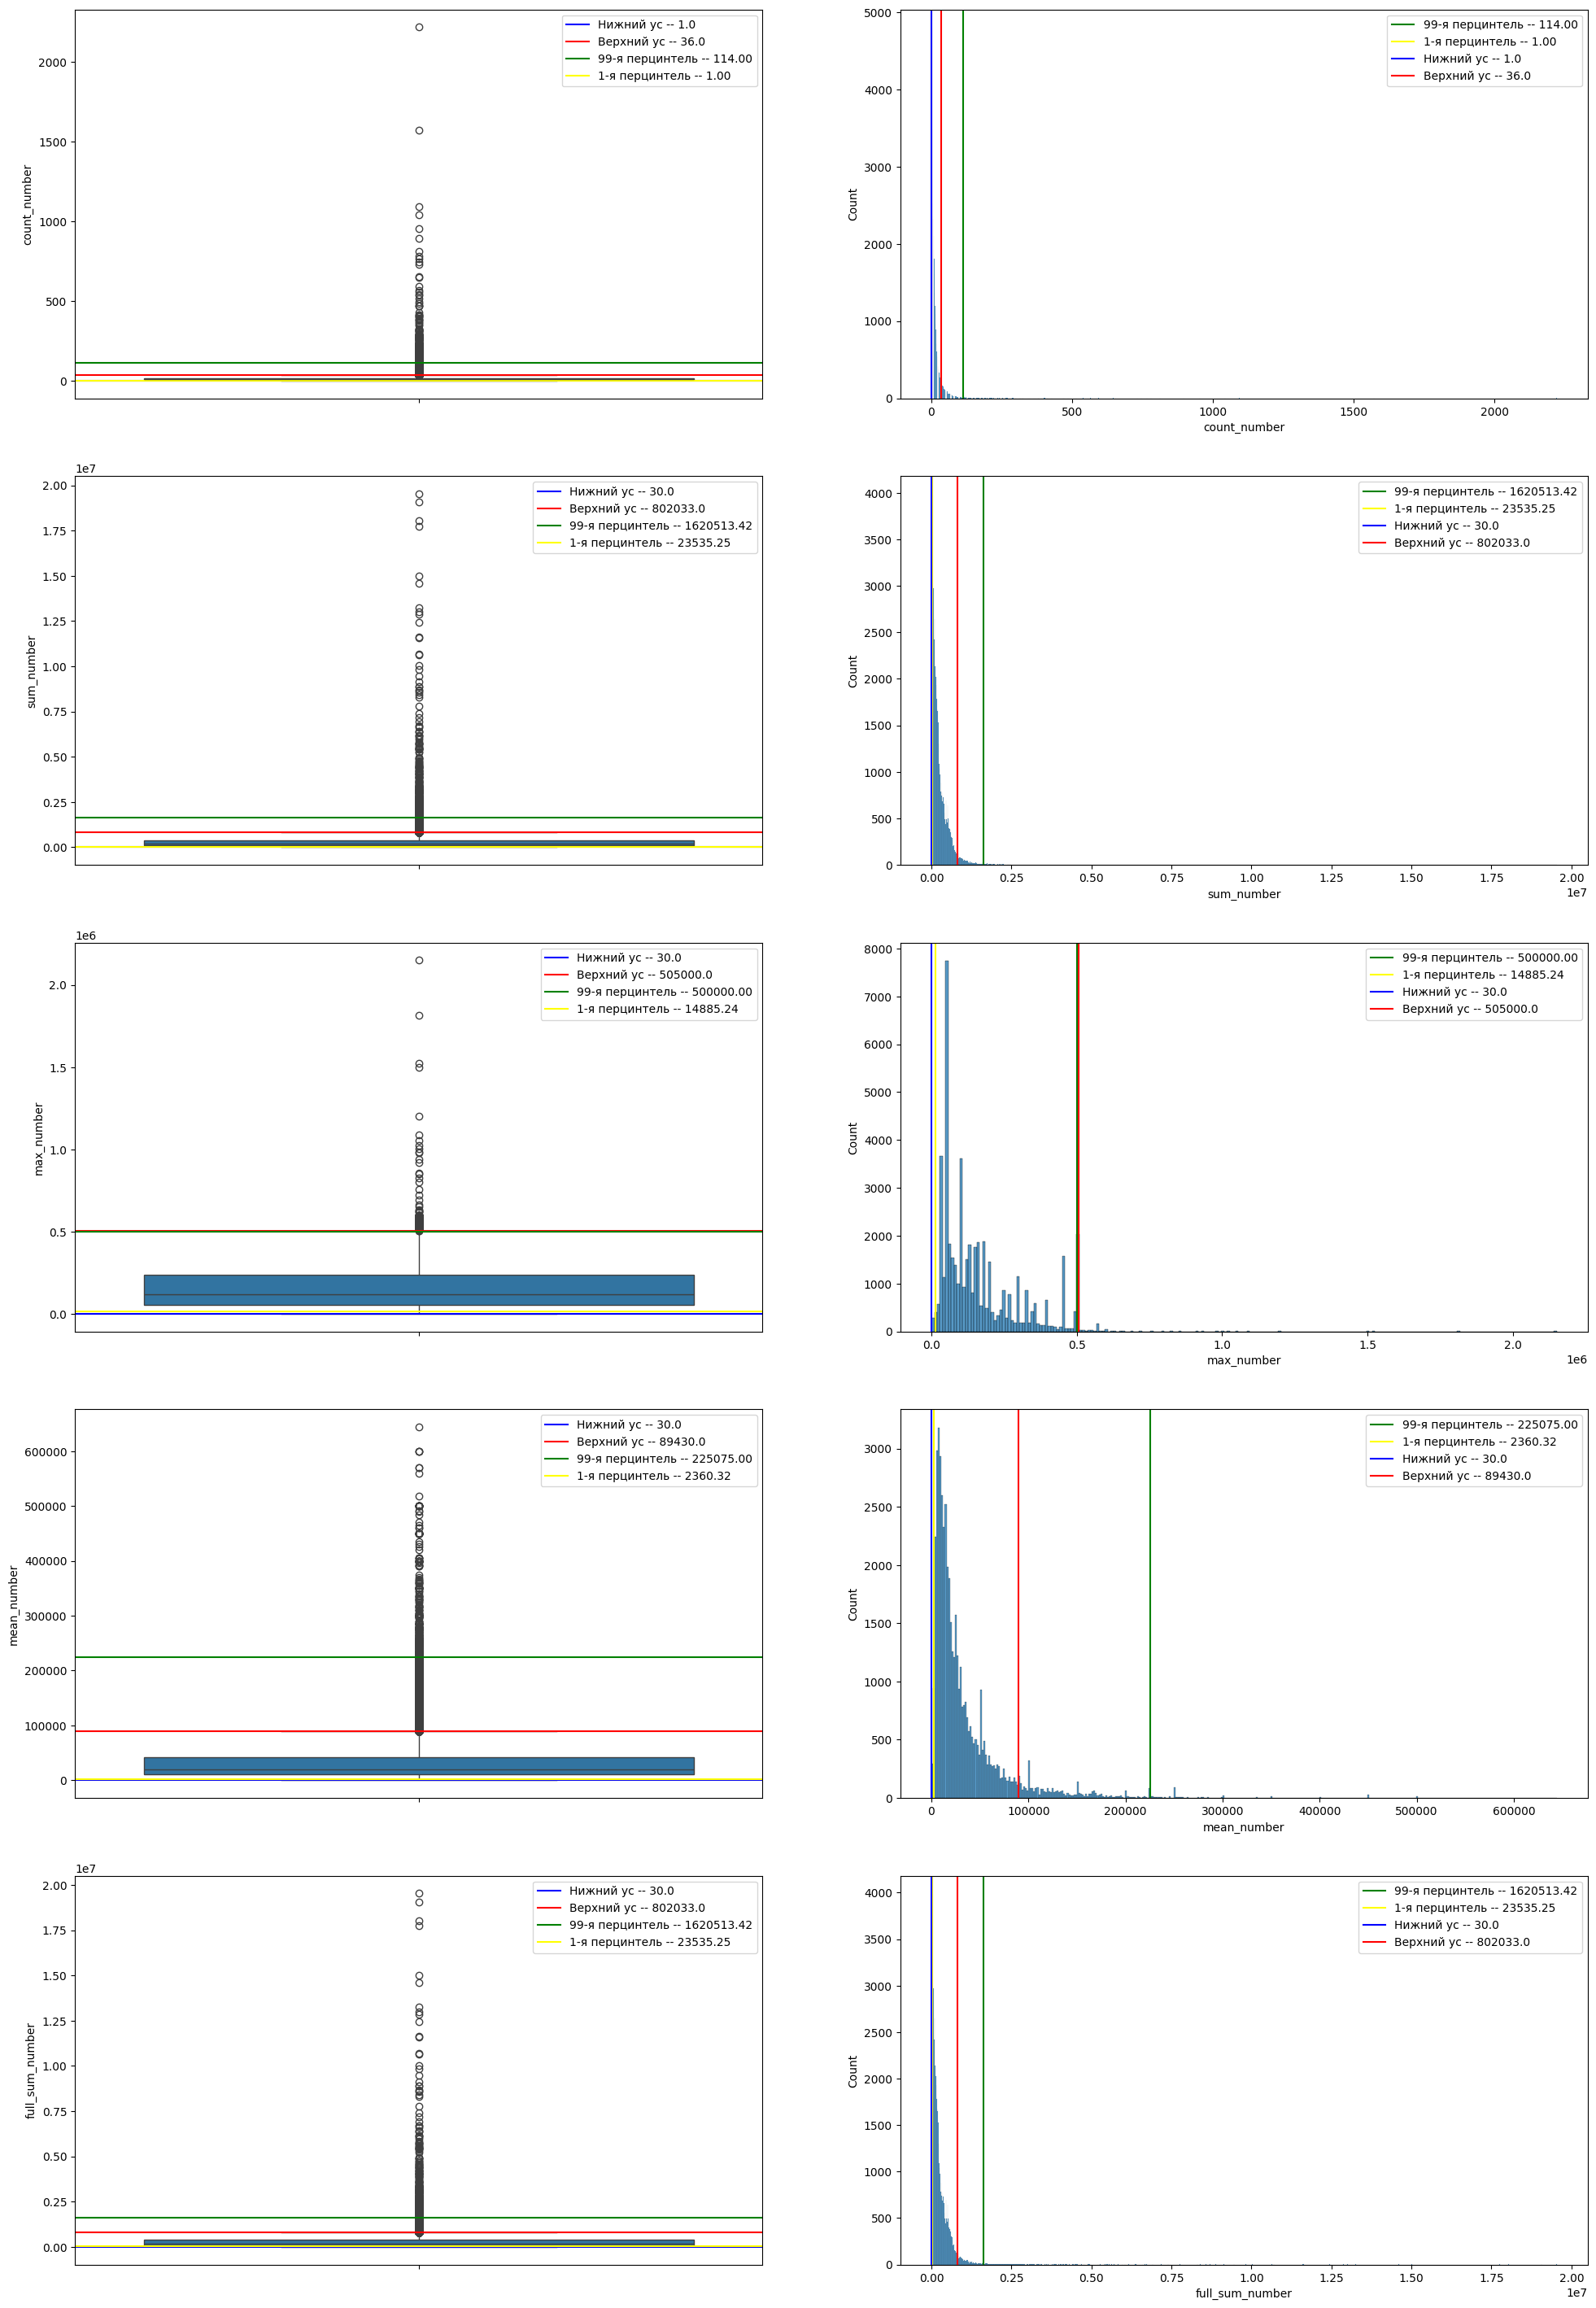

In [ ]:
#поиск аномальных значений для непрерывных признаков
plt.subplots(5, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont[:5], start=0):
    plt.subplot(5, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижний ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(5, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижний ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()

In [ ]:
#  создаем фильтр данных по верхнему и нижнему перцителям, по границам усов
filter11 = (
    (df['count_number'].between(calc_boxplot(df['count_number'])[0], # нижний ус
                                        np.nanpercentile(df['count_number'], 99))) # 99я перцинтиль
  & (df['sum_number'].between(calc_boxplot(df['sum_number'])[0],
                                  np.nanpercentile(df['sum_number'], 99)))
  & (df['max_number'].between(calc_boxplot(df['max_number'])[0],
                                               calc_boxplot(df['max_number'])[1]))
  & (df['mean_number'].between(calc_boxplot(df['mean_number'])[0],
                                          np.nanpercentile(df['mean_number'], 99)))
  & (df['full_sum_number'].between(calc_boxplot(df['full_sum_number'])[0],
                                         np.nanpercentile(df['full_sum_number'], 99)))
  & (df['geography_number'].between(calc_boxplot(df['geography_number'])[0],
                                         np.nanpercentile(df['geography_number'], 99)))
  )

In [ ]:
df[filter11]

,client_id,date_ birth,sign_delay,count_number,type_number,geography_number,geography_phone,sum_number,max_number,mean_number,full_sum_number,client channel,tele_operator,age
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49759,3653998,1982-12-08,MIDDLE,112.0,16.0,77.0,77.0,761065.34,384000.0,6795.2262,761065.34,Офис,МегаФон,Ж
49762,7375286,1955-09-07,MIDDLE,111.0,0.0,77.0,78.0,334021.00,50000.0,3009.1981,334021.00,Офис,Мобильные ТелеСистемы,Ж
49772,23846951,1965-03-18,GOOD,114.0,2.0,77.0,77.0,741352.48,93000.0,6503.0919,741352.48,Офис,МегаФон,Ж
49773,23674209,1973-01-23,GOOD,114.0,0.0,77.0,77.0,1031800.00,195000.0,9050.8771,1031800.00,Офис,МегаФон,М


In [ ]:
# фильтрация значений
print(f"Процент аномальных значений {(1 - df[filter11].shape[0] / df.shape[0]):.2%}")

Процент аномальных значений 6.32%


In [ ]:
df=df[filter11]

In [ ]:
df['sum_number'].max() # проверили фильтр, т.е. значение 498002.0  нет

1619371.0

In [ ]:
df['geography_number'].max() # проверили фильтр, т.е. значения 1.953691e+07  нет

78.0

In [ ]:
# Смотрим на пропуски данных
df.isna().sum()

client_id              0
date_ birth            0
sign_delay             1
count_number           0
type_number            0
geography_number       0
geography_phone     1741
sum_number             0
max_number             0
mean_number            0
full_sum_number        0
client channel        24
tele_operator        581
age                    7
dtype: int64

In [ ]:
# Посмотрели на пропуски 'geography_phone'
df11=df[df['geography_phone'].isna()]
df11

,client_id,date_ birth,sign_delay,count_number,type_number,geography_number,geography_phone,sum_number,max_number,mean_number,full_sum_number,client channel,tele_operator,age
186,12509532,1970-01-03,BAD,2.0,69.0,77.0,NaN,55150.0,55000.0,27575.0000,55150.0,Офис,МегаФон,М
204,14185965,1990-11-05,MIDDLE,1.0,69.0,77.0,NaN,70000.0,70000.0,70000.0000,70000.0,Офис,Вымпел-Коммуникации,Ж
205,2648219,1982-06-07,BAD,9.0,0.0,77.0,NaN,134000.0,85000.0,14888.8888,134000.0,Офис,МегаФон,Ж
225,14130712,1969-09-27,MIDDLE,12.0,5.0,62.0,NaN,186600.0,135000.0,15550.0000,186600.0,Партнер,МегаФон,Ж
244,14560254,1964-09-10,GOOD,4.0,5.0,71.0,NaN,106753.0,51253.0,26688.2500,106753.0,Стойка,Вотек Мобайл,Ж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49318,2098314,1984-06-13,MIDDLE,61.0,5.0,77.0,NaN,329389.0,80000.0,5399.8196,329389.0,Офис,МегаФон,Ж
49443,14188570,1967-09-09,GOOD,67.0,16.0,77.0,NaN,155496.0,150000.0,2320.8358,155496.0,Офис,Ростовская Сотовая Связь,Ж
49462,13314119,1988-07-29,MIDDLE,68.0,16.0,62.0,NaN,82609.0,50000.0,1214.8382,82609.0,Офис,МегаФон,Ж
49474,11526927,1973-03-20,GOOD,69.0,10.0,77.0,NaN,301147.0,160000.0,4364.4492,301147.0,Офис,Ростовская Сотовая Связь,М


In [ ]:
# Заменим пропущенные данные  заполнить на основании признака 'geography_number'
# Посчитаем  выборочное среднее и медиану признака 'geography_number'
mean = df11['geography_number'].mean()
median = df11['geography_number'].median()
print(mean)
print(median)

66.23549684089603
77.0


In [ ]:
df[df['tele_operator'].isna()]

,client_id,date_ birth,sign_delay,count_number,type_number,geography_number,geography_phone,sum_number,max_number,mean_number,full_sum_number,client channel,tele_operator,age
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
5,11343857,1983-05-06,BAD,2.0,1.0,77.0,77.0,50150.00,50000.0,25075.0000,50150.00,Стойка,NaN,Ж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47342,1707282,1979-01-10,GOOD,48.0,2.0,77.0,77.0,437350.00,165000.0,9111.4583,437350.00,Партнер,NaN,М
48104,30010824,1966-01-28,MIDDLE,37.0,0.0,77.0,NaN,453896.00,200000.0,12267.4594,453896.00,Офис,NaN,Ж
48792,2125491,1971-05-24,GOOD,57.0,2.0,77.0,77.0,757350.00,190000.0,13286.8421,757350.00,Офис,NaN,Ж
49081,2228715,1985-10-03,GOOD,67.0,2.0,78.0,78.0,681464.33,190000.0,10171.1094,681464.33,Офис,NaN,М


In [ ]:
# Т.к. с  пропущенными значениями признака 'tele_operator' нет логического варианта,
# то заменим пропущенные значения на медиану признака 'geography_number' и 'нет значения'
df.fillna({'geography_phone': df['geography_number'].median(),
           'tele_operator': 'оператор не указан'},
          inplace=True)

In [ ]:
# проверили, что произошла замена
df.loc[0]['tele_operator']

'Оператор не указан'

In [ ]:
df['tele_operator'].value_counts()

tele_operator
МегаФон                                               13266
Вымпел-Коммуникации                                   12670
Мобильные ТелеСистемы                                 11196
МобильныеТелеСистемы                                   1722
Санкт-Петербург Телеком                                1105
Ростовская Сотовая Связь                               1092
Вотек Мобайл                                            899
ЕКАТЕРИНБУРГ-2000                                       596
Оператор не указан                                      581
Ростелеком                                              568
Челябинская Сотовая Связь                               527
Нижегородская сотовая связь                             448
Кемеровская Мобильная Связь                             358
Смоленская Сотовая Связь                                237
Сибирская Сотовая Связь                                 182
Персональные Системы Связи в Регионе                    163
Волгоград-GSM             

In [ ]:
df.isna().sum()

client_id            0
date_ birth          0
sign_delay           1
count_number         0
type_number          0
geography_number     0
geography_phone      0
sum_number           0
max_number           0
mean_number          0
full_sum_number      0
client channel      24
tele_operator        0
age                  7
dtype: int64

In [ ]:
# оставшяиеся пропуски подлежат удалению
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

client_id           0
date_ birth         0
sign_delay          0
count_number        0
type_number         0
geography_number    0
geography_phone     0
sum_number          0
max_number          0
mean_number         0
full_sum_number     0
client channel      0
tele_operator       0
age                 0
dtype: int64

Шаг 3. Добавление новых признаков

In [ ]:
# Добавляем новый столбец 'vozrast'
df['vozrast'] = 2022-df['date_ birth'].dt.year
df

,client_id,date_ birth,sign_delay,count_number,type_number,geography_number,geography_phone,sum_number,max_number,mean_number,full_sum_number,client channel,tele_operator,age,vozrast
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,Оператор не указан,Ж,41
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,Оператор не указан,М,43
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М,65
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,Оператор не указан,М,45
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,Оператор не указан,М,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49759,3653998,1982-12-08,MIDDLE,112.0,16.0,77.0,77.0,761065.34,384000.0,6795.2262,761065.34,Офис,МегаФон,Ж,40
49762,7375286,1955-09-07,MIDDLE,111.0,0.0,77.0,78.0,334021.00,50000.0,3009.1981,334021.00,Офис,Мобильные ТелеСистемы,Ж,67
49772,23846951,1965-03-18,GOOD,114.0,2.0,77.0,77.0,741352.48,93000.0,6503.0919,741352.48,Офис,МегаФон,Ж,57
49773,23674209,1973-01-23,GOOD,114.0,0.0,77.0,77.0,1031800.00,195000.0,9050.8771,1031800.00,Офис,МегаФон,М,49


Шаг 4. Исследовательский анализ данных

In [ ]:
# Группируем данные по признаку 'sign_delay' и найдем основные статистики
df.groupby('sign_delay')[lst_cont]\
  .agg(['mean', 'median'])


count_number            sum_number               max_number  \
                   mean median           mean    median           mean   
sign_delay                                                               
BAD            9.840738    6.0  205915.845988  135600.0  146642.605215   
GOOD          14.382272    9.0  269240.340487  193003.0  166607.816466   
MIDDLE        15.303226   10.0  263410.579511  183035.0  159810.679908   

                       mean_number             full_sum_number            
              median          mean      median            mean    median  
sign_delay                                                                
BAD         100000.0  34444.669923  22821.4285   205915.845988  135600.0  
GOOD        125000.0  33130.950545  20364.3752   269240.340487  193003.0  
MIDDLE      115000.0  28819.957432  17550.0000   263410.579511  183035.0

In [ ]:
# Обратим внимание на колонку "median", делаем вывод, что хорошие и средние клиенты сделали больше всего переводов.

In [ ]:
# расчитаем моду для непрерывных признаков
df.groupby('sign_delay')[lst_cont].agg(pd.Series.mode)

,count_number,sum_number,max_number,mean_number,full_sum_number
sign_delay,,,,,
BAD,2.0,30100.0,50000.0,15050.0,30100.0
GOOD,3.0,50150.0,50000.0,25075.0,50150.0
MIDDLE,3.0,50150.0,50000.0,30000.0,50150.0


In [ ]:
# Исходя из значений, делаем вывод, что хорошие и средние клиенты сделали больше всего переводов.

In [ ]:
# расчет моды для категориальных признаков
df.groupby('sign_delay')[lst_disc].agg(pd.Series.mode)

,sign_delay,geography_number,geography_phone,type_number,client channel,tele_operator,age
sign_delay,,,,,,,
BAD,BAD,77.0,77.0,2.0,Партнер,Вымпел-Коммуникации,М
GOOD,GOOD,77.0,77.0,2.0,Офис,МегаФон,Ж
MIDDLE,MIDDLE,77.0,77.0,2.0,Офис,МегаФон,Ж


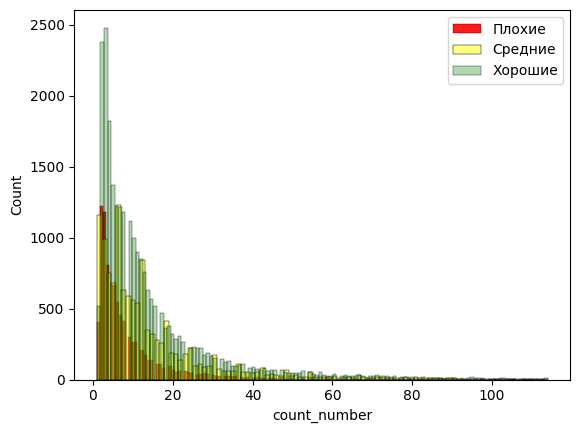

In [ ]:
# Построим функцию плотности для понимания соответствия и групировки клиентов по признаку "sign_delay"
sns.histplot(df[df['sign_delay'] == 'BAD']['count_number'],
             color='red',
             label='Плохие',
             alpha=0.9);
sns.histplot(df[df['sign_delay'] == 'MIDDLE']['count_number'],
             color='yellow',
             label='Средние',
             alpha=0.5);
sns.histplot(df[df['sign_delay'] == 'GOOD']['count_number'],
             color='green',
             label='Хорошие',
             alpha=0.3);
plt.legend()

In [ ]:
# В данной гистограмме значений видим, как распределены значения групп клиентов

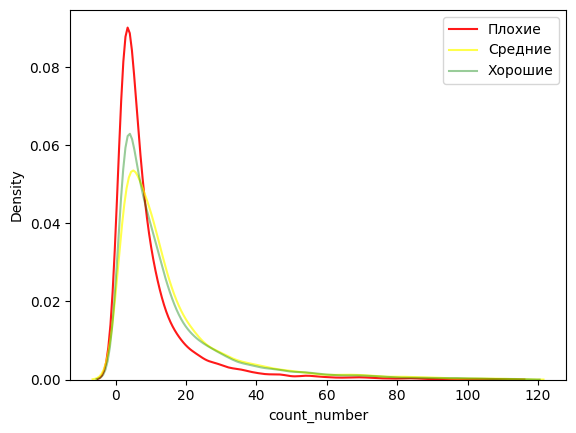

In [ ]:
sns.kdeplot(df[df['sign_delay'] == 'BAD']['count_number'],
             color='red',
             label='Плохие',
             alpha=0.9);
sns.kdeplot(df[df['sign_delay'] == 'MIDDLE']['count_number'],
             color='yellow',
             label='Средние',
             alpha=0.7);
sns.kdeplot(df[df['sign_delay'] == 'GOOD']['count_number'],
             color='green',
             label='Хорошие',
             alpha=0.4);
plt.legend()

In [ ]:
# Анализируя данныое распределение, делем вывод, что 'BAD' (плохие) совершают маленькое количество переводов

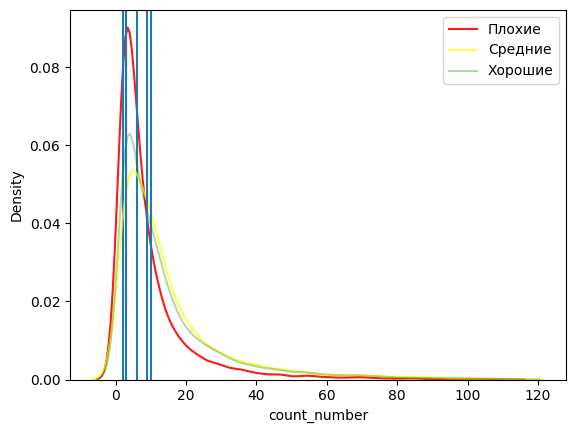

In [ ]:
sns.kdeplot(df[df['sign_delay'] == 'BAD']['count_number'],
             color='red',
             label='Плохие',
             alpha=0.9);
plt.axvline(df[df['sign_delay'] == 'BAD']['count_number'].mode()[0])
plt.axvline(df[df['sign_delay'] == 'BAD']['count_number'].median())
sns.kdeplot(df[df['sign_delay'] == 'MIDDLE']['count_number'],
             color='yellow',
             label='Средние',
             alpha=0.7);
plt.axvline(df[df['sign_delay'] == 'MIDDLE']['count_number'].mode()[0])
plt.axvline(df[df['sign_delay'] == 'MIDDLE']['count_number'].median())
sns.kdeplot(df[df['sign_delay'] == 'GOOD']['count_number'],
             color='green',
             label='Хорошие',
             alpha=0.3);
plt.axvline(df[df['sign_delay'] == 'GOOD']['count_number'].mode()[0])
plt.axvline(df[df['sign_delay'] == 'GOOD']['count_number'].median())
plt.legend()

In [ ]:
# По представленному графику делаем вывод, что распределения признаков и их медианы распологаются одинаково, вертикальные линии на графике располагаются правее.
# Значит есть отличия по количеству переводов между 'BAD'(Плохими), 'MIDDLE'(Средними),'GOOD' (Хорошими).

In [ ]:
# Критерий Колмогорова-Смирнова - подчиняюстся ли признаки одному закону
ks_2samp(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'MIDDLE']['count_number'])

KstestResult(statistic=0.2299027626084712, pvalue=5.802664180150468e-238, statistic_location=7.0, statistic_sign=1)

In [ ]:
ks_2samp(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

KstestResult(statistic=0.17986120694406815, pvalue=1.8074578752308682e-182, statistic_location=8.0, statistic_sign=1)

In [ ]:
ks_2samp(df[df['sign_delay'] == 'MIDDLE']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

KstestResult(statistic=0.052959866250212595, pvalue=6.784850093760732e-21, statistic_location=4.0, statistic_sign=-1)

In [ ]:
# вывод: все представленные распределения разные - подчиняются разным законам. Гипотезу отвергаем.

In [ ]:
# Критерий Краскела-Уолиса - проверяем гипотезу о равенстве медиан величинам
kruskal(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'MIDDLE']['count_number'])

KruskalResult(statistic=1227.7323668120118, pvalue=5.7324346032337965e-269)

In [ ]:
kruskal(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

KruskalResult(statistic=944.9830429169027, pvalue=1.6342149106064048e-207)

In [ ]:
kruskal(df[df['sign_delay'] == 'MIDDLE']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

KruskalResult(statistic=83.25258903692549, pvalue=7.221088604703019e-20)

In [ ]:
# вывод: все представленные распределения подчиняются равенству pvalue < alpha = 0.05, то есть количество переводов отличается для всех вариантов. Гипотезу отвергаем.

In [ ]:
# Критерий Манна-Уитни - проверяем гипотезу о равенстве выборочных средних или медиан
mannwhitneyu(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'MIDDLE']['count_number'])

MannwhitneyuResult(statistic=38831465.5, pvalue=5.732664989297164e-269)

In [ ]:
mannwhitneyu(df[df['sign_delay'] == 'BAD']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

MannwhitneyuResult(statistic=84977277.5, pvalue=1.6342469901123584e-207)

In [ ]:
mannwhitneyu(df[df['sign_delay'] == 'MIDDLE']['count_number'], \
         df[df['sign_delay'] == 'GOOD']['count_number'])

MannwhitneyuResult(statistic=167968819.0, pvalue=7.221121939994815e-20)

In [ ]:
# вывод: все представленные распределения подчиняются равенству pvalue < alpha = 0.05, то есть количество переводов отличается для всех вариантов. Гипотезу отвергаем.